In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")
french_polynesia = df[df['Country_code'] == 'PF']
french_polynesia

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
17394,2020-01-05,PF,French Polynesia,WPRO,NaN,0,NaN,0
17395,2020-01-12,PF,French Polynesia,WPRO,NaN,0,NaN,0
17396,2020-01-19,PF,French Polynesia,WPRO,NaN,0,NaN,0
17397,2020-01-26,PF,French Polynesia,WPRO,NaN,0,NaN,0
17398,2020-02-02,PF,French Polynesia,WPRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
17612,2024-03-10,PF,French Polynesia,WPRO,NaN,79299,NaN,650
17613,2024-03-17,PF,French Polynesia,WPRO,NaN,79299,NaN,650
17614,2024-03-24,PF,French Polynesia,WPRO,1.0,79300,NaN,650
17615,2024-03-31,PF,French Polynesia,WPRO,1.0,79301,NaN,650


In [6]:
filtered_french_polynesia = french_polynesia.fillna(0)
columns_to_convert = ['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
filtered_french_polynesia[columns_to_convert] = filtered_french_polynesia[columns_to_convert].astype(int)

In [7]:
filtered_french_polynesia

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
17394,2020-01-05,PF,French Polynesia,WPRO,0,0,0,0
17395,2020-01-12,PF,French Polynesia,WPRO,0,0,0,0
17396,2020-01-19,PF,French Polynesia,WPRO,0,0,0,0
17397,2020-01-26,PF,French Polynesia,WPRO,0,0,0,0
17398,2020-02-02,PF,French Polynesia,WPRO,0,0,0,0
...,...,...,...,...,...,...,...,...
17612,2024-03-10,PF,French Polynesia,WPRO,0,79299,0,650
17613,2024-03-17,PF,French Polynesia,WPRO,0,79299,0,650
17614,2024-03-24,PF,French Polynesia,WPRO,1,79300,0,650
17615,2024-03-31,PF,French Polynesia,WPRO,1,79301,0,650


## Infection Rate

### Daily Infection Rate
$\text{每日感染率} = \frac{\text{每日新增感染人数}}{\text{总人口数}}$

### Cumulative Infection Rate
$\text{累计感染率} = \frac{\text{累计感染人数}}{\text{总人口数}}$

## Recovery Rate

### Daily Recovery Rate
$\text{每日恢复率} = \frac{\text{每日新增恢复人数}}{\text{总感染人数}}$

### Cumulative Recovery Rate
$\text{累计恢复率} = \frac{\text{累计恢复人数}}{\text{累计感染人数}}$

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


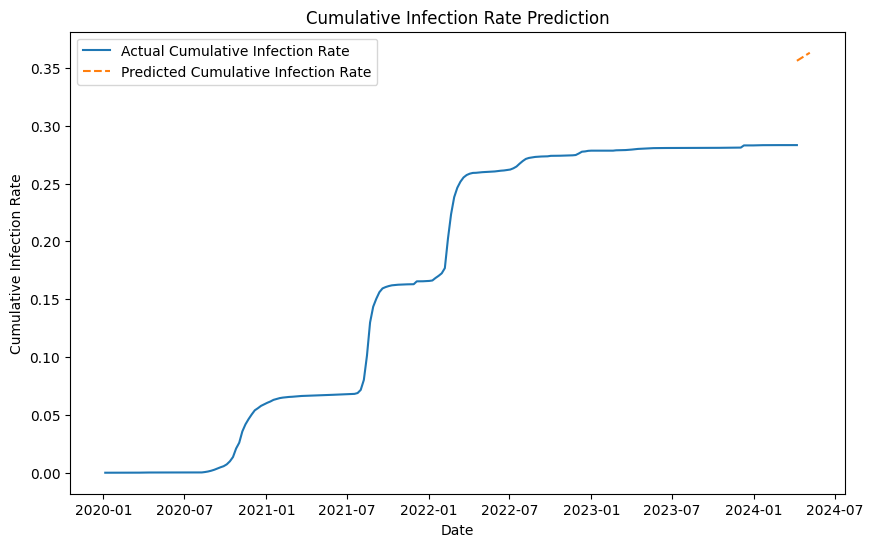

感染率系数（斜率）: 0.00024044381447888835
截距: -177.32778470466798
         Date  Predicted_Cumulative_infection_rate
0  2024-04-07                             0.356107
1  2024-04-08                             0.356347
2  2024-04-09                             0.356588
3  2024-04-10                             0.356828
4  2024-04-11                             0.357068
5  2024-04-12                             0.357309
6  2024-04-13                             0.357549
7  2024-04-14                             0.357790
8  2024-04-15                             0.358030
9  2024-04-16                             0.358271
10 2024-04-17                             0.358511
11 2024-04-18                             0.358752
12 2024-04-19                             0.358992
13 2024-04-20                             0.359232
14 2024-04-21                             0.359473
15 2024-04-22                             0.359713
16 2024-04-23                             0.359954
17 2024-04-24           

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 假设数据已经加载到filtered_french_polynesia DataFrame中
#filtered_french_polynesia = pd.read_csv('path_to_your_file.csv')  # 替换为实际文件路径

# 转换日期为数值形式
filtered_french_polynesia['Date_reported'] = pd.to_datetime(filtered_french_polynesia['Date_reported'])
filtered_french_polynesia['Date_ordinal'] = filtered_french_polynesia['Date_reported'].map(pd.Timestamp.toordinal)

# 计算累计感染率
population = 280000  # 假设French Polynesia的人口为280,000
filtered_french_polynesia['Cumulative_infection_rate'] = filtered_french_polynesia['Cumulative_cases'] / population

# 准备训练数据
X = filtered_french_polynesia[['Date_ordinal']]
y = filtered_french_polynesia['Cumulative_infection_rate']

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X, y)

# 获取模型系数和截距
slope = model.coef_[0]
intercept = model.intercept_

# 预测未来的感染率
future_dates = pd.date_range(start=filtered_french_polynesia['Date_reported'].max(), periods=30, freq='D')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

predictions = model.predict(future_dates_ordinal)

# 将预测结果转换为DataFrame
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Cumulative_infection_rate': predictions
})

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(filtered_french_polynesia['Date_reported'], filtered_french_polynesia['Cumulative_infection_rate'], label='Actual Cumulative Infection Rate')
plt.plot(predictions_df['Date'], predictions_df['Predicted_Cumulative_infection_rate'], label='Predicted Cumulative Infection Rate', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Infection Rate')
plt.title('Cumulative Infection Rate Prediction')
plt.legend()
plt.show()

# 打印模型系数和截距
print(f"感染率系数（斜率）: {slope}")
print(f"截距: {intercept}")

# 显示预测结果
print(predictions_df)

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


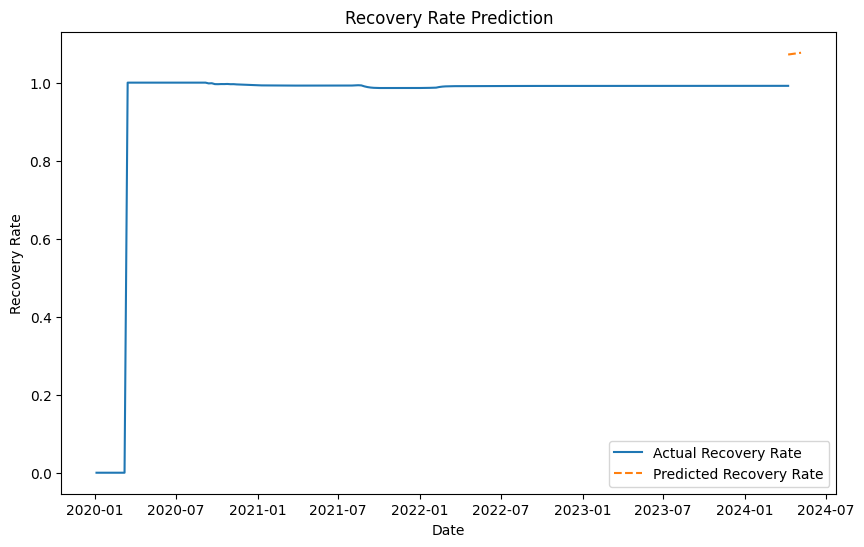

恢复率系数（斜率）: 0.0001596794251527994
截距: -116.9283184745349
         Date  Predicted_Recovery_rate
0  2024-04-07                 1.072062
1  2024-04-08                 1.072222
2  2024-04-09                 1.072382
3  2024-04-10                 1.072541
4  2024-04-11                 1.072701
5  2024-04-12                 1.072861
6  2024-04-13                 1.073020
7  2024-04-14                 1.073180
8  2024-04-15                 1.073340
9  2024-04-16                 1.073499
10 2024-04-17                 1.073659
11 2024-04-18                 1.073819
12 2024-04-19                 1.073978
13 2024-04-20                 1.074138
14 2024-04-21                 1.074298
15 2024-04-22                 1.074457
16 2024-04-23                 1.074617
17 2024-04-24                 1.074777
18 2024-04-25                 1.074936
19 2024-04-26                 1.075096
20 2024-04-27                 1.075256
21 2024-04-28                 1.075415
22 2024-04-29                 1.075575
23 2024-

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 假设数据已经加载到filtered_french_polynesia DataFrame中
# filtered_french_polynesia = pd.read_csv('path_to_your_file.csv')  # 替换为实际文件路径

# 转换日期为数值形式
filtered_french_polynesia['Date_reported'] = pd.to_datetime(filtered_french_polynesia['Date_reported'])
filtered_french_polynesia['Date_ordinal'] = filtered_french_polynesia['Date_reported'].map(pd.Timestamp.toordinal)

# 计算累计恢复率
filtered_french_polynesia['Cumulative_recoveries'] = filtered_french_polynesia['Cumulative_cases'] - filtered_french_polynesia['Cumulative_deaths']
filtered_french_polynesia['Recovery_rate'] = filtered_french_polynesia['Cumulative_recoveries'] / filtered_french_polynesia['Cumulative_cases']

# 替换NaN值为0（在最初的零病例情况下恢复率会出现NaN）
filtered_french_polynesia['Recovery_rate'].fillna(0, inplace=True)

# 准备训练数据
X = filtered_french_polynesia[['Date_ordinal']]
y = filtered_french_polynesia['Recovery_rate']

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X, y)

# 获取模型系数和截距
slope = model.coef_[0]
intercept = model.intercept_

# 预测未来的恢复率
future_dates = pd.date_range(start=filtered_french_polynesia['Date_reported'].max(), periods=30, freq='D')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

predictions = model.predict(future_dates_ordinal)

# 将预测结果转换为DataFrame
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Recovery_rate': predictions
})

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(filtered_french_polynesia['Date_reported'], filtered_french_polynesia['Recovery_rate'], label='Actual Recovery Rate')
plt.plot(predictions_df['Date'], predictions_df['Predicted_Recovery_rate'], label='Predicted Recovery Rate', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Recovery Rate')
plt.title('Recovery Rate Prediction')
plt.legend()
plt.show()

# 打印模型系数和截距
print(f"恢复率系数（斜率）: {slope}")
print(f"截距: {intercept}")

# 显示预测结果
print(predictions_df)

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


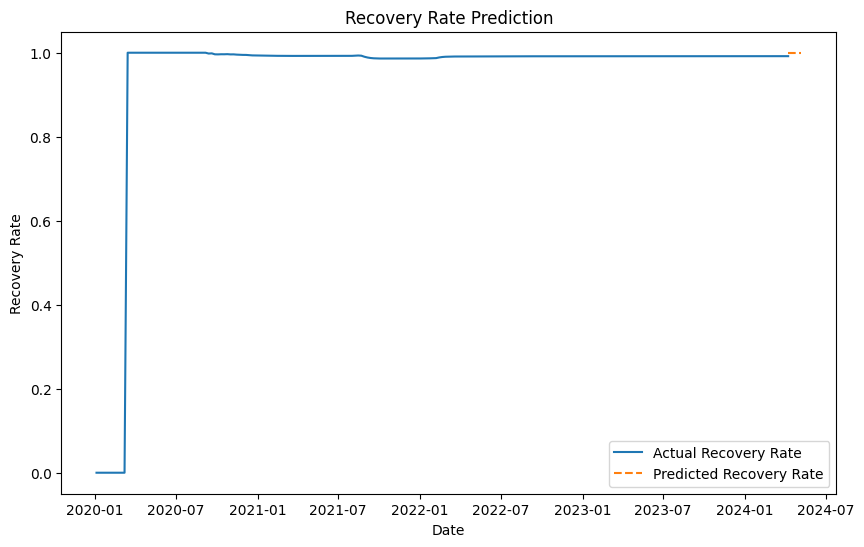

恢复率系数（斜率）: 0.0001596794251527994
截距: -116.9283184745349
         Date  Predicted_Recovery_rate
0  2024-04-07                      1.0
1  2024-04-08                      1.0
2  2024-04-09                      1.0
3  2024-04-10                      1.0
4  2024-04-11                      1.0
5  2024-04-12                      1.0
6  2024-04-13                      1.0
7  2024-04-14                      1.0
8  2024-04-15                      1.0
9  2024-04-16                      1.0
10 2024-04-17                      1.0
11 2024-04-18                      1.0
12 2024-04-19                      1.0
13 2024-04-20                      1.0
14 2024-04-21                      1.0
15 2024-04-22                      1.0
16 2024-04-23                      1.0
17 2024-04-24                      1.0
18 2024-04-25                      1.0
19 2024-04-26                      1.0
20 2024-04-27                      1.0
21 2024-04-28                      1.0
22 2024-04-29                      1.0
23 2024-

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 假设数据已经加载到filtered_french_polynesia DataFrame中
# filtered_french_polynesia = pd.read_csv('path_to_your_file.csv')  # 替换为实际文件路径

# 转换日期为数值形式
filtered_french_polynesia['Date_reported'] = pd.to_datetime(filtered_french_polynesia['Date_reported'])
filtered_french_polynesia['Date_ordinal'] = filtered_french_polynesia['Date_reported'].map(pd.Timestamp.toordinal)

# 计算累计恢复率
filtered_french_polynesia['Cumulative_recoveries'] = filtered_french_polynesia['Cumulative_cases'] - filtered_french_polynesia['Cumulative_deaths']
filtered_french_polynesia['Recovery_rate'] = filtered_french_polynesia['Cumulative_recoveries'] / filtered_french_polynesia['Cumulative_cases']

# 替换NaN值为0（在最初的零病例情况下恢复率会出现NaN）
filtered_french_polynesia['Recovery_rate'].fillna(0, inplace=True)

# 准备训练数据
X = filtered_french_polynesia[['Date_ordinal']]
y = filtered_french_polynesia['Recovery_rate']

# 创建并训练线性回归模型
model = LinearRegression()
model.fit(X, y)

# 获取模型系数和截距
slope = model.coef_[0]
intercept = model.intercept_

# 预测未来的恢复率
future_dates = pd.date_range(start=filtered_french_polynesia['Date_reported'].max(), periods=30, freq='D')
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

predictions = model.predict(future_dates_ordinal)

# 确保预测恢复率在0到1之间
predictions = np.clip(predictions, 0, 1)

# 将预测结果转换为DataFrame
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Recovery_rate': predictions
})

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(filtered_french_polynesia['Date_reported'], filtered_french_polynesia['Recovery_rate'], label='Actual Recovery Rate')
plt.plot(predictions_df['Date'], predictions_df['Predicted_Recovery_rate'], label='Predicted Recovery Rate', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Recovery Rate')
plt.title('Recovery Rate Prediction')
plt.legend()
plt.show()

# 打印模型系数和截距
print(f"恢复率系数（斜率）: {slope}")
print(f"截距: {intercept}")

# 显示预测结果
print(predictions_df)

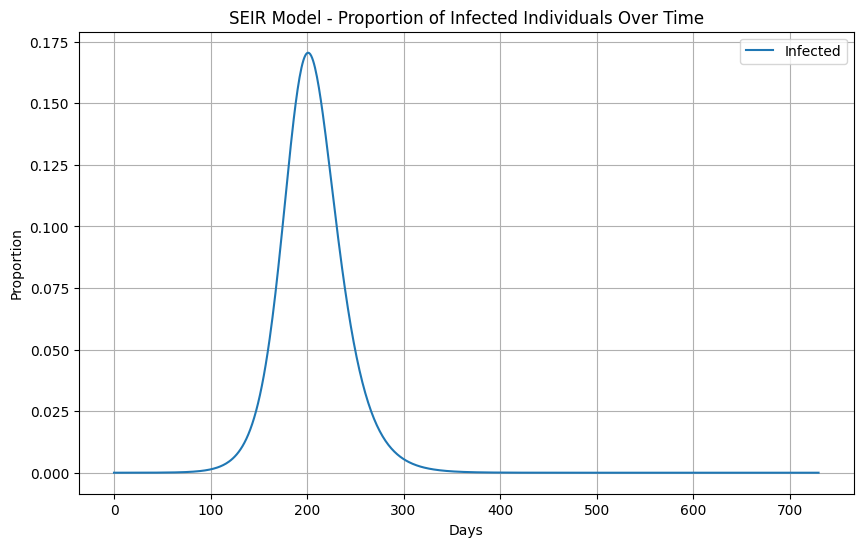

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 定义SEIR模型
def seir_model(y, t, beta, gamma, sigma):
    S, E, I, R = y
    N = S + E + I + R
    dS_dt = -beta * S * I / N
    dE_dt = beta * S * I / N - sigma * E
    dI_dt = sigma * E - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dE_dt, dI_dt, dR_dt]

# 初始条件和参数
population = 283147  # French Polynesia 总人口
I0, E0, R0 = 1, 0, 0  # 初始感染者，暴露者和康复者
S0 = population - I0 - E0 - R0  # 初始易感者
beta = 0.1775  # 初始传染率
gamma = 0.071  # 恢复率
sigma = 0.2  # 暴露者转为感染者的进展率

# 时间跨度
days = 365 * 2
t = np.linspace(0, days, days)

# 求解ODE
initial_conditions = [S0, E0, I0, R0]
solution = odeint(seir_model, initial_conditions, t, args=(beta, gamma, sigma))
S, E, I, R = solution.T

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(t, I/population, label='Infected')
plt.xlabel('Days')
plt.ylabel('Proportion')
plt.legend()
plt.title('SEIR Model - Proportion of Infected Individuals Over Time')
plt.grid(True)
plt.show()